In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Titanic datasat analysis
###### My goal is to calculate the probabolity of survival and esimate what factors influenced survival

### Downloading the dataset

In [2]:
titanic = pd.read_csv('titanic.csv')

### Data analising and preprocessing

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


First I want to divide age into categories to make the analysis easier

In [5]:
titanic['age category'] = pd.cut(titanic['age'], 
                                 bins=[0, 12, 18, 60, 100],
                                 labels=['child', 'adolescent', 'adult', 'senior'])


In [6]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age category
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,adolescent
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


Second, I will create the column with total number of relatives on board

In [7]:
titanic['family size'] = titanic['sibsp'] +titanic['parch']

#### Let's see which factors have impact on survival

<Axes: xlabel='pclass', ylabel='survived'>

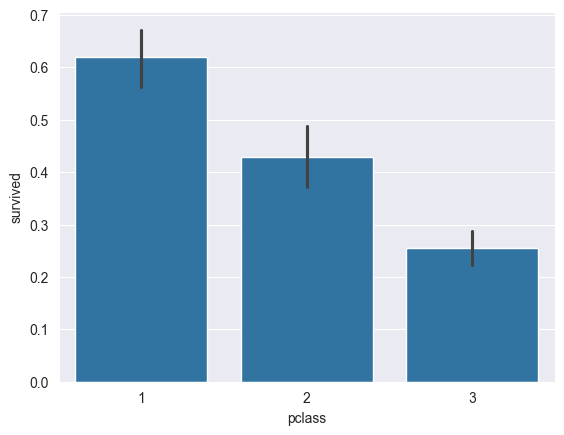

In [8]:
sns.barplot(data=titanic, x='pclass', y='survived')

As we can see, passenger class has a impact on survival.

<Axes: xlabel='sex', ylabel='survived'>

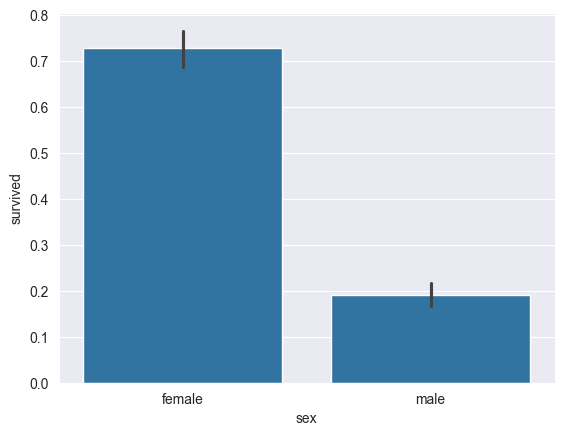

In [9]:
sns.barplot(data=titanic, x='sex', y='survived')

Sex has even more significant impact

<Axes: xlabel='age category', ylabel='survived'>

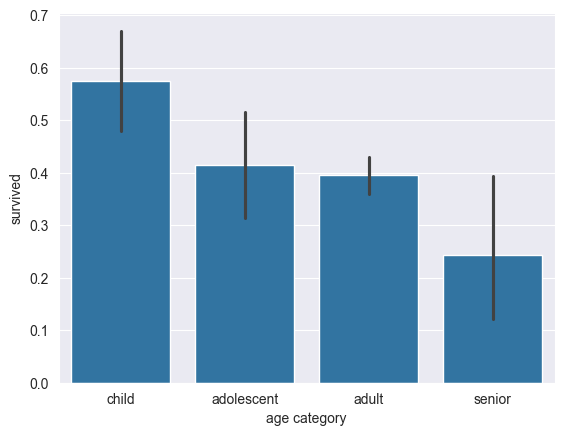

In [10]:
sns.barplot(data=titanic, x='age category', y='survived')

Here we see that children had the highest survival rate, while seniors had the lowest.

<Axes: xlabel='age category', ylabel='survived'>

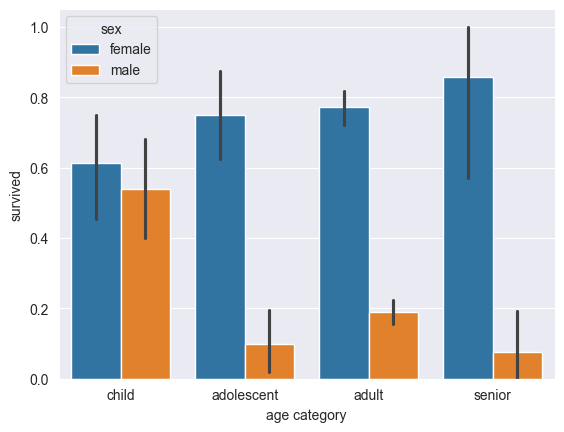

In [11]:
sns.barplot(data=titanic, x='age category', y='survived', hue='sex')


The sex did not influence the survival rate for children, confirming that the "women and children first" rule was applied on the ship.

<Axes: xlabel='family size', ylabel='survived'>

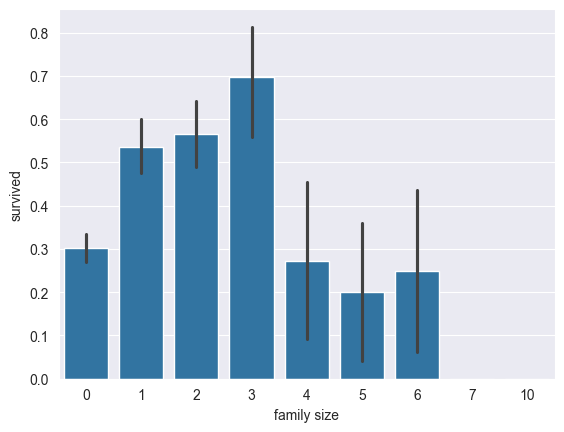

In [12]:
sns.barplot(data=titanic, x='family size', y='survived')

# Calculating probability for survival on the ship

The full probability of survival on the ship
The formula is P=survivors / number of passengers

In [22]:
P_full = titanic.survived.where(titanic.survived == 1).count() / titanic.survived.count()

In [23]:
P_full

np.float64(0.3819709702062643)

This means that each passenger had almost a 40% chance of survival

To calculate the probability of survival for women and men, I will use the conditional probability
The formula is P = P(B ∩ A) / P(B)

P(A ∩ B) - this is probability of event A subject to event B

For example, to calculate the probability of survival of women, the event A is that a woman was choosed and the evebt B is that he is survived

In [50]:
A = titanic.sex.where(titanic.sex == 'female').count() / titanic.sex.count()
AB = titanic[(titanic.sex == 'female') & (titanic.survived == 1)].shape[0] / titanic.shape[0]

P_W = AB / A

In [51]:
P_W

np.float64(0.7274678111587982)

To calculate the probability of survival for men, it is enough to subtract the probability of survival for women and 1

In [53]:
P_M = 1 - P_W
P_M

np.float64(0.2725321888412018)

So we see that mans has only 27% probability of survival when womens 73%